# Jupiter's Notebook for Scenario 10
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-10-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(437872, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 433018, 1: 4854})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    437872
srcIP                  13832
srcPrt                 55581
dstIP                  10476
dstPrt                   549
flowduration          308521
total_fpackets           822
total_bpackets          1064
total_fpktl            12738
total_bpktl            32009
min_fpktl                133
min_bpktl                497
max_fpktl               1301
max_bpktl                945
mean_fpktl             30581
mean_bpktl             38193
std_fpktl              57195
std_bpktl              46960
total_fipt            149666
total_bipt            122154
min_fipt               69688
min_bipt               30339
max_fipt              143763
max_bipt              107014
mean_fipt             142460
mean_bipt             118180
std_fipt              128318
std_bipt              113788
fpsh_cnt                 162
bpsh_cnt                 486
furg_cnt                   1
burg_cnt                   1
total_fhlen             4087
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(437872, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(437872, 49)
(435073, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,2393,80,5.511684,82,101,5392,141281,60,54,74,1434,65.756096,1398.821777,5.764003,207.669469,5.511674,5.511604,0.003130,0.000049,4.549062,4.610000,0.068045,0.055116,0.504145,0.460220,0,59,0,0,2400,2020,14.877486,18.324709,33.202194,2.661129e+04,801.491803,682.350647,0.055131,0.473263,2,0,0,183,0,0,0,26.201965,0
1,TCP,38712,80,0.169033,8,8,777,6239,60,54,355,1434,97.125000,779.875000,104.199585,705.118913,0.169033,0.168299,0.000010,0.000004,0.084678,0.083616,0.024148,0.024043,0.040865,0.040623,1,2,0,0,168,168,47.328022,47.328022,94.656044,4.150668e+04,438.500000,601.162292,0.011358,0.029481,1,2,4,15,0,0,0,8.029601,0
2,TCP,2379,80,1.669388,3,2,180,108,60,54,60,54,60.000000,54.000000,0.000000,0.000000,1.669388,0.038362,0.002274,0.038362,1.667114,0.038362,0.834694,0.038362,1.177220,0.000000,0,0,0,0,60,40,1.797066,1.198044,2.995110,1.725183e+02,57.600000,3.286335,0.825670,0.950892,2,0,0,5,0,0,0,0.600000,0
3,TCP,80,2375,0.170626,2,2,108,120,54,60,54,60,54.000000,60.000000,0.000000,0.000000,0.170619,0.002223,0.170619,0.002223,0.170619,0.002223,0.170619,0.002223,0.000000,0.000000,0,0,0,0,40,40,11.721548,11.721548,23.443096,1.336256e+03,57.000000,3.464102,0.113010,0.097869,2,0,0,4,0,0,0,1.111111,0
4,TCP,42169,80,1.201151,12,11,1039,8229,66,66,305,1434,86.583336,748.090881,68.821847,667.619717,1.201151,1.137063,0.000017,0.000007,0.932928,0.998247,0.109196,0.113706,0.274784,0.311756,1,3,0,0,392,364,9.990417,9.157882,19.148298,7.715932e+03,402.956522,564.907898,0.055015,0.197568,2,2,0,22,0,0,0,7.920115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437867,UDP,28492,53,0.000169,1,1,83,134,83,134,83,134,83.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,49,100,5924.158203,5924.158203,11848.316406,1.285542e+06,108.500000,36.062447,0.000169,0.000000,0,0,0,0,0,0,0,1.614458,0
437868,UDP,44806,53,0.000000,1,0,75,0,75,0,75,0,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,41,0,0.000000,0.000000,0.000000,0.000000e+00,75.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
437869,UDP,44807,53,0.000000,1,0,76,0,76,0,76,0,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,42,0,0.000000,0.000000,0.000000,0.000000e+00,76.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0
437870,UDP,44808,53,0.000370,1,1,69,218,69,218,69,218,69.000000,218.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,35,184,2704.257812,2704.257812,5408.515625,7.761220e+05,143.500000,105.358910,0.000370,0.000000,0,0,0,0,0,0,0,3.159420,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 430467 of 435073 (98.9%)
> Class 1 : 4606 of 435073 (1.1%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((348058, 48), (87015, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
40462,0.041245,4.423524e-10,0.003929,13.595091,32,34,5166,30175,60,54,475,1434,161.4375,887.5,178.105971,547.354810,13.595079,13.595076,0.000013,0.000007,6.459935,6.497782,0.438551,0.411972,1.445653,1.410766,8,16,0,0,652,692,2.353791,2.500903,4.854693,2.599541e+03,535.469697,548.569458,0.286666,1.173698,2,2,0,65,0,0,0,5.841076
52904,0.041245,1.273683e-03,0.003929,17.152914,4,3,246,174,60,54,66,66,61.5000,58.0,3.000000,6.928203,17.152913,17.124695,0.028282,0.000075,16.847019,17.124620,5.717638,8.562347,9.639133,12.108883,0,0,0,0,92,72,0.233197,0.174897,0.408094,2.448564e+01,60.000000,4.898980,2.858835,6.853646,2,2,0,6,0,0,0,0.707317
193159,0.001834,5.067455e-04,0.000215,4.960125,1,1,77,77,77,77,77,77,77.0000,77.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,0.201608,0.201608,0.403216,3.104760e+01,77.000000,0.000000,4.960125,0.000000,0,0,0,0,0,0,0,1.000000
355839,0.001834,5.067455e-04,0.000215,24.749982,1,1,72,72,72,72,72,72,72.0000,72.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,0.040404,0.040404,0.080808,5.818186e+00,72.000000,0.000000,24.749983,0.000000,0,0,0,0,0,0,0,1.000000
248090,0.001834,3.583216e-06,0.000215,4.960182,1,1,77,77,77,77,77,77,77.0000,77.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,0.201605,0.201606,0.403211,3.104725e+01,77.000000,0.000000,4.960182,0.000000,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260487,0.001834,9.734583e-06,0.000215,0.190407,1,1,72,72,72,72,72,72,72.0000,72.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,5.251913,5.251913,10.503826,7.562755e+02,72.000000,0.000000,0.190407,0.000000,0,0,0,0,0,0,0,1.000000
368058,0.001834,9.734583e-06,0.000215,0.000460,1,1,77,77,77,77,77,77,77.0000,77.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,43,43,2173.214600,2173.214600,4346.429199,3.346750e+05,77.000000,0.000000,0.000460,0.000000,0,0,0,0,0,0,0,1.000000
132229,0.001834,9.090545e-02,0.000215,0.172288,1,1,78,78,78,78,78,78,78.0000,78.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,44,44,5.804229,5.804229,11.608458,9.054597e+02,78.000000,0.000000,0.172288,0.000000,0,0,0,0,0,0,0,1.000000
147288,0.001834,9.734583e-06,0.000215,0.000129,1,1,166,54,166,54,166,54,166.0000,54.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,132,20,7752.872559,7752.872559,15505.745117,1.705632e+06,110.000000,79.195961,0.000129,0.000000,0,0,0,0,0,0,0,0.325301


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
89247,0.041245,2.980547e-12,0.003929,5.236434,33,57,3140,73644,60,54,644,1434,95.151512,1292.000000,139.778429,403.310940,5.236426,5.236417,0.001796,0.000007,4.682031,4.827829,0.163638,0.093507,0.824895,0.644521,2,18,0,0,672,1152,6.301999,10.885270,17.187269,1.466341e+04,853.155556,667.649658,0.111553,0.696536,2,2,0,89,0,0,0,23.453503
298201,0.001834,3.268566e-09,0.000215,0.000326,1,1,74,313,74,313,74,313,74.000000,313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,279,3066.011719,3066.011719,6132.023438,1.186546e+06,193.500000,168.998520,0.000326,0.000000,0,0,0,0,0,0,0,4.229730
7538,0.041245,8.884878e-09,0.003929,9.138903,19,31,2358,34950,60,54,691,1434,124.105263,1127.419312,191.148250,556.042010,9.138889,9.138885,0.000014,0.000008,4.838614,5.014261,0.507716,0.304630,1.324349,1.083448,2,10,0,0,392,632,2.079024,3.392092,5.471116,4.082328e+03,746.160000,666.874634,0.283167,1.050292,2,2,0,49,0,0,0,14.821883
143641,0.001834,2.641998e-05,0.000215,19.997519,1,1,74,74,74,74,74,74,74.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,40,0.050006,0.050006,0.100012,7.400918e+00,74.000000,0.000000,19.997519,0.000000,0,0,0,0,0,0,0,1.000000
66246,0.041245,5.067455e-04,0.003929,5.071868,7,7,924,2242,66,66,520,1434,132.000000,320.285706,171.117893,510.047632,5.071868,5.071843,0.001780,0.000004,5.005645,5.008905,0.845311,0.845307,2.038170,2.039800,1,2,0,0,232,236,1.380162,1.380162,2.760324,6.242276e+02,226.142857,378.322174,0.775316,1.872757,2,2,0,13,0,0,0,2.426407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250979,0.001834,1.914755e-05,0.000215,90.060672,6,0,480,0,80,0,80,0,80.000000,0.000000,0.000000,0.000000,90.060671,0.000000,15.014410,0.000000,20.028748,0.000000,18.012135,0.000000,2.376400,0.000000,0,0,0,0,276,0,0.066622,0.000000,0.066622,5.329741e+00,80.000000,0.000000,18.012134,2.376399,0,0,0,0,0,0,0,0.000000
169286,0.001834,3.583216e-06,0.000215,0.740677,1,1,68,68,68,68,68,68,68.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,34,34,1.350116,1.350116,2.700233,1.836158e+02,68.000000,0.000000,0.740677,0.000000,0,0,0,0,0,0,0,1.000000
421917,0.001834,5.067455e-04,0.000215,0.000362,1,1,72,72,72,72,72,72,72.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,2761.227051,2761.227051,5522.454102,3.976167e+05,72.000000,0.000000,0.000362,0.000000,0,0,0,0,0,0,0,1.000000
52166,0.041245,1.068500e-02,0.003929,10.571477,26,39,4127,38497,60,54,432,1434,158.730774,987.102539,165.368571,560.003519,10.571473,10.571436,0.005548,0.000007,4.186811,4.738168,0.422859,0.278196,0.892103,0.843057,7,14,0,0,532,792,2.459448,3.689172,6.148621,4.031981e+03,655.753846,603.445007,0.230507,0.772226,2,2,0,64,0,0,0,9.328083


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,1.858157,-0.180039,-0.069149,0.018785,0.007934,0.013958,0.021576,0.007406,-0.872852,-0.617058,1.558032,2.294226,1.712553,1.963568,2.005487,2.281296,0.051881,0.114697,-0.207006,-0.084925,0.179738,0.265098,-0.223653,-0.105703,0.066860,0.083590,0.067199,0.046012,0.0,0.0,-0.001102,0.009205,-0.167391,-0.196068,-0.190610,-0.242028,1.766146,2.012233,-0.418517,-0.041104,2.051745,1.841653,-0.191126,0.020563,0.0,-0.004365,-0.004195,0.443377
1,1.858157,-0.159377,-0.069149,0.062156,-0.011911,-0.008030,-0.014584,-0.007807,-0.872852,-0.617058,-0.497200,-0.540372,-0.724381,-0.550380,-0.375060,-0.410848,0.095641,0.168621,-0.201770,-0.084908,1.043636,1.107961,0.623627,1.471683,2.038807,2.502081,-0.015572,-0.014343,0.0,0.0,-0.001206,-0.012769,-0.167618,-0.196385,-0.190893,-0.244329,-0.575915,-0.548333,-0.060208,1.370459,2.051745,1.841653,-0.191126,-0.006628,0.0,-0.004365,-0.004195,-0.409492
2,-0.538168,-0.171818,-0.108264,-0.086477,-0.014037,-0.009449,-0.015826,-0.007856,0.000944,-0.313223,-0.441925,-0.517579,-0.346420,-0.492797,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001215,-0.013797,-0.167622,-0.196382,-0.190894,-0.244323,-0.492176,-0.571406,0.232507,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
3,-0.538168,-0.171818,-0.108264,0.154766,-0.014037,-0.009449,-0.015863,-0.007858,-0.256055,-0.379274,-0.467050,-0.527939,-0.468343,-0.507950,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001216,-0.013974,-0.167639,-0.196404,-0.190914,-0.244346,-0.516805,-0.571406,2.989279,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
4,-0.538168,-0.179981,-0.108264,-0.086476,-0.014037,-0.009449,-0.015826,-0.007856,0.000944,-0.313223,-0.441925,-0.517579,-0.346420,-0.492797,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001215,-0.013797,-0.167622,-0.196382,-0.190894,-0.244323,-0.492176,-0.571406,0.232515,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348053,-0.538168,-0.179881,-0.108264,-0.144621,-0.014037,-0.009449,-0.015863,-0.007858,-0.256055,-0.379274,-0.467050,-0.527939,-0.468343,-0.507950,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001216,-0.013974,-0.167080,-0.195693,-0.190251,-0.243675,-0.516805,-0.571406,-0.431926,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
348054,-0.538168,-0.179881,-0.108264,-0.146936,-0.014037,-0.009449,-0.015826,-0.007856,0.000944,-0.313223,-0.441925,-0.517579,-0.346420,-0.492797,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001215,-0.013797,0.065620,0.100111,0.085561,0.054734,-0.492176,-0.571406,-0.458386,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
348055,-0.538168,1.294646,-0.108264,-0.144841,-0.014037,-0.009449,-0.015819,-

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,1.858157,-0.180039,-0.069149,-0.083108,0.008643,0.030272,0.006686,0.029448,-0.872852,-0.617058,2.407260,2.294226,0.096197,3.189477,1.484428,1.563739,-0.050928,-0.013001,-0.206676,-0.084925,0.031869,0.132646,-0.267776,-0.167338,-0.082539,-0.089633,0.005121,0.053556,0.0,0.0,-0.001098,0.025508,-0.166967,-0.194924,-0.189826,-0.231247,3.330998,2.573074,-0.442910,-0.159686,2.051745,1.841653,-0.191126,0.031624,0.0,-0.004365,-0.004195,3.369323
1,-0.538168,-0.180039,-0.108264,-0.146938,-0.014037,-0.009449,-0.015848,-0.007736,-0.153255,2.804390,-0.457000,-0.028570,-0.419574,0.222443,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001216,-0.005433,0.161449,0.221927,0.199145,0.816018,0.081677,0.224539,-0.458405,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,0.175685
2,1.858157,-0.180039,-0.069149,-0.035537,-0.001280,0.011831,0.000939,0.009827,-0.872852,-0.617058,2.643436,2.294226,0.802222,2.690686,2.182795,2.324572,-0.002929,0.046619,-0.207006,-0.084924,0.044892,0.147433,-0.212553,-0.126478,0.037666,0.009594,0.005121,0.023379,0.0,0.0,-0.001150,0.007078,-0.167420,-0.195946,-0.190571,-0.240703,2.803961,2.569424,-0.419004,-0.071772,2.051745,1.841653,-0.191126,0.013189,0.0,-0.004365,-0.004195,1.935355
3,-0.538168,-0.179610,-0.108264,0.096832,-0.014037,-0.009449,-0.015848,-0.007857,-0.153255,-0.352853,-0.457000,-0.523795,-0.419574,-0.501889,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001216,-0.013903,-0.167638,-0.196402,-0.190913,-0.244345,-0.506954,-0.571406,2.327250,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
4,1.858157,-0.171818,-0.069149,-0.085115,-0.009785,-0.005193,-0.009601,-0.006758,-0.564453,-0.458535,1.784158,2.294226,0.994732,0.244524,1.910484,2.095450,-0.052952,-0.015515,-0.206679,-0.084925,0.058784,0.147008,-0.158369,-0.021838,0.209463,0.225794,-0.005226,-0.006798,0.0,0.0,-0.001180,-0.006957,-0.167495,-0.196221,-0.190744,-0.243793,0.242469,1.210407,-0.350447,0.132624,2.051745,1.841653,-0.191126,-0.003402,0.0,-0.004365,-0.004195,-0.123900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87010,-0.538168,-0.179728,-0.108264,0.950917,-0.010494,-0.010158,-0.012864,-0.007895,0.155143,-1.330410,-0.426850,-0.677129,-0.273266,-0.726159,-0.415845,-0.445361,0.992383,-0.092999,2.573950,-0.084926,1.308262,-0.250271,2.596864,-0.185435,0.290865,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001172,-0.015321,-0.167636,-0.196409,-0.190915,-0.244346,-0.477399,-0.571406,2.050682,0.257788,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.526998
87011,-0.538168,-0.179981,-0.108264,-0.137913,-0.014037,-0.009449,-0.015892,-0.007860,-0.461654,-0.432115,-0.487150,-0.536228,-0.565881,-0.520073,-0.415845,-0.445361,-0.115335,-0.092999,-0.207008,-0.084926,-0.357538,-0.250271,-0.294040,-0.185435,-0.281069,-0.235338,-0.015572,-0.014343,0.0,0.0,-0.001217,-0.014116,-0.167499,-0.196225,-0.190747,-0.244187,-0.536508,-0.571406,-0.355272,-0.332787,-0.456787,-0.508496,-0.191126,-0.009393,0.0,-0.004365,-0.004195,-0.360869
87012,-0.538168,-0.171818,-0.108264,-0.146937,-0.014037,-0.009449,-0.015863,-0.007858,-0.256055,-0.379274,-0.4

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'flow_cwr', 'flow_ece', 'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((348058, 45), (87015, 45))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)

In [33]:
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.998 total time= 4.2min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 4.2min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 4.2min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.998 total time= 4.2min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 4.1min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 3.9min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 3.1min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 3.9min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 4.0min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 3.9min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.998 total time= 4.3min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [34]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9979026488630744


In [35]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     86128
     class 1       0.79      0.99      0.88       887

    accuracy                           1.00     87015
   macro avg       0.90      0.99      0.94     87015
weighted avg       1.00      1.00      1.00     87015



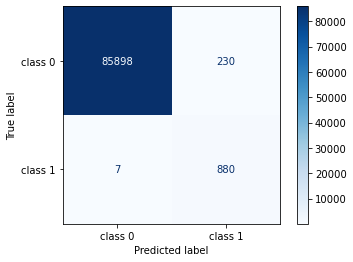

In [36]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [38]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 344339, 1: 3719})
Resample dataset shape: Counter({0: 344339, 1: 344339})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [39]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=GridSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)
model2.fit(X_smote,y_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 9.0min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.998 total time= 9.3min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.997 total time= 9.4min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.998 total time=11.6min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.997 total time=10.4min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 9.3min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.999 total time= 6.8min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 9.3min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.999 total time= 9.1min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.998 total time= 9.3min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.998 total time=10.1min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9984637232515612
Best Model: LogisticRegression(C=0.01, max_iter=1000, solver='saga')


In [41]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     86128
     class 1       0.77      1.00      0.87       887

    accuracy                           1.00     87015
   macro avg       0.88      1.00      0.93     87015
weighted avg       1.00      1.00      1.00     87015



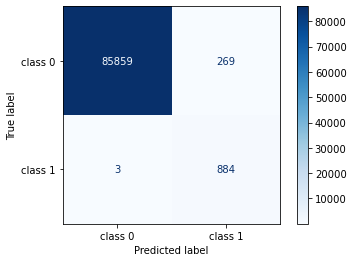

In [42]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-DT)

In [43]:
#Run grid search only on training set using cross-validation
parameters = {'criterion':['gini','entropy'], 'max_depth' : [2,4,6,8,10,12]}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.988 total time=   1.1s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.987 total time=   1.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.987 total time=   1.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.987 total time=   1.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.986 total time=   1.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.999 total time=   1.6s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.999 total time=   1.5s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.999 total time=   1.5s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   1.0s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.998 total time=   1.1s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.999 total time=   1.6s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [44]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10}
accuracy : 0.9999425381887577
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)


In [45]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     86128
     class 1       1.00      0.86      0.92       887

    accuracy                           1.00     87015
   macro avg       1.00      0.93      0.96     87015
weighted avg       1.00      1.00      1.00     87015



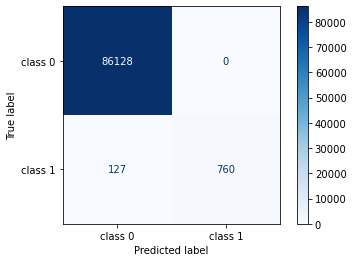

In [46]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [48]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [49]:
# define the undersampling method
oss = OneSidedSelection(random_state=0)
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)

Counter({0: 341888, 1: 3719})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [50]:
#Run grid search only on training set using cross-validation
parameters = {'C':[1, 5, 10] }
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5, verbose=3)
model4.fit(X_oss, y_oss)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=1;, score=0.999 total time=  51.4s
[CV 2/5] END ...............................C=1;, score=0.999 total time= 3.0min
[CV 3/5] END ...............................C=1;, score=0.999 total time= 1.9min
[CV 4/5] END ...............................C=1;, score=0.999 total time=  49.2s
[CV 5/5] END ...............................C=1;, score=0.999 total time=  49.3s
[CV 1/5] END ...............................C=5;, score=1.000 total time=  46.5s
[CV 2/5] END ...............................C=5;, score=1.000 total time= 2.6min
[CV 3/5] END ...............................C=5;, score=0.999 total time= 1.5min
[CV 4/5] END ...............................C=5;, score=1.000 total time=  47.3s
[CV 5/5] END ...............................C=5;, score=0.999 total time=  46.7s
[CV 1/5] END ..............................C=10;, score=1.000 total time= 1.4min
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10]}, verbose=3)

In [51]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10}
accuracy : 0.9997772035950938
Best Model: SVC(C=10, class_weight='balanced')


In [52]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     86128
     class 1       0.98      0.92      0.95       887

    accuracy                           1.00     87015
   macro avg       0.99      0.96      0.97     87015
weighted avg       1.00      1.00      1.00     87015



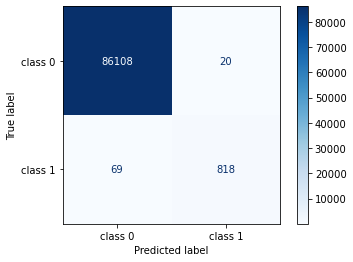

In [53]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [55]:
#Run grid search only on training set using cross-validation
parameters = {'max_depth': [5, 10],'n_estimators': [100, 150], 'learning_rate': [0.1, 0.2]}
model5 = GridSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False), parameters, cv=5, verbose=3)
model5.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.9s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.7s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.9s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   5.8s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   7.7s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   7.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   7.7s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   7.8s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

In [56]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("accuracy :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
accuracy : 0.9999540305427516
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [57]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     86128
     class 1       1.00      0.85      0.92       887

    accuracy                           1.00     87015
   macro avg       1.00      0.92      0.96     87015
weighted avg       1.00      1.00      1.00     87015



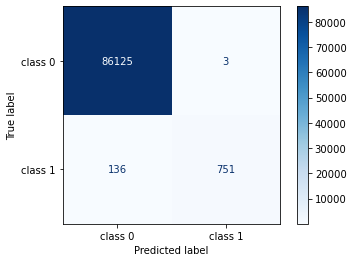

In [58]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [59]:
#save notebook session
import dill
dill.dump_session('session_esc-10.db')
#to restore a notebook session
#dill.load_session('session_esc-10.db')